In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/foodpanda-order-and-delivery-trends/Foodpanda Analysis Dataset.csv


In [2]:
#Install libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)

In [3]:
df=pd.read_csv('/kaggle/input/foodpanda-order-and-delivery-trends/Foodpanda Analysis Dataset.csv')
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


# Data Preprocessing Steps
* Checking the null values and duplicate values, shape of the data
* Some Statistical Information of the data.

In [4]:
# Create a Function to analyse find the 
def basic_information(df):
    df.info() # Data informatin
    print('*'*80)
    null_values=df.isna().sum()/len(df)*100 # Checking null values
    print(null_values)
    print('*'*80)
    duplicate_values=df.duplicated().sum() # duplicate values
    print(f'The data contains {duplicate_values} values ')
    print('*'*80)
    print(f'The data {df.shape} values') # shape of the data
print(basic_information(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [5]:
# adding the new columns as revenue 
df['revenue']=df['quantity']*df['price']

In [6]:
df.describe().style.background_gradient(cmap='cubehelix_r')

,quantity,price,order_frequency,loyalty_points,rating,revenue
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.991667,800.524880,25.304667,250.173667,2.996833,2390.652013
std,1.414778,404.855029,14.358930,144.608478,1.406113,1754.874758
min,1.000000,100.300000,1.000000,0.000000,1.000000,101.730000
25%,2.000000,441.997500,13.000000,125.000000,2.000000,994.937500
50%,3.000000,806.460000,25.000000,249.500000,3.000000,1901.575000
75%,4.000000,1149.737500,37.000000,378.000000,4.000000,3500.265000
max,5.000000,1499.950000,50.000000,500.000000,5.000000,7496.850000


# Data Visualization 
* The data provides an in-depth analysis of the data, accompanied by some charts.


### Gender Distribution And Age Visualizations

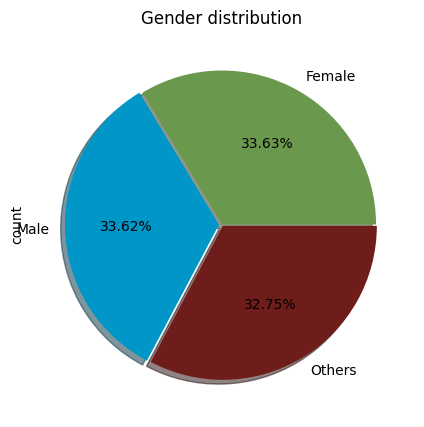

In [7]:
'''
Firstly, we analyze the gender distribution in the data for a better understanding.

'''

df['gender'].value_counts()\
.plot(kind='pie',
    explode=[0,0.02,0.01],
    labels=['Female','Male','Others'],
    colors=['#6a994e','#0096c7','#6f1d1b'],
    autopct='%1.2f%%',shadow=True,title='Gender distribution',figsize=(8,5))
plt.show()

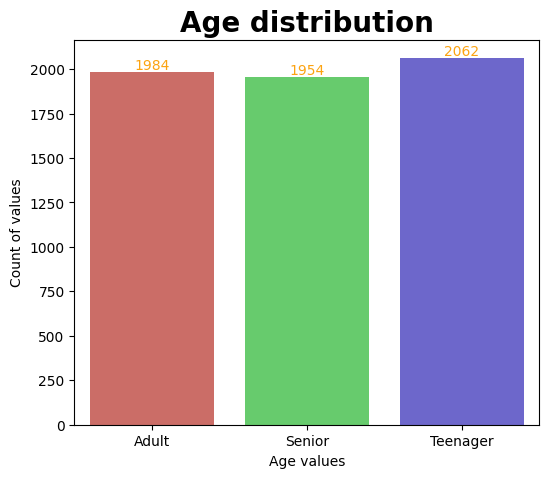

<Figure size 640x480 with 0 Axes>

In [8]:
'''
We used a count plot to analyze the age distribution. Our observations show that teenagers are the highest spenders in sales.
'''

plt.figure(figsize=(6,5))
ax=sns.countplot(df,x='age',palette='hls') # Countplot
ax.bar_label(ax.containers[0],fontsize=10,color='#fca311',fmt='%g')
ax.set_title('Age distribution',fontsize=20,fontweight='bold',loc='center') 
ax.set_xlabel('Age values')
ax.set_ylabel('Count of values')
plt.show()
plt.tight_layout()

## Create a function to convert all the datetime columns into the correct format for better understanding of the data through line charts.

In [9]:
# Create a function to return the columns in date-time format
def convert_the_datatime_format(df):
    return pd.to_datetime(df)
# Then apply the above function to the datetime columns
df['signup_date']=df['signup_date'].apply(convert_the_datatime_format)
df['order_date']=df['order_date'].apply(convert_the_datatime_format)
df['last_order_date']=df['last_order_date'].apply(convert_the_datatime_format)
df['rating_date']=df['rating_date'].apply(convert_the_datatime_format)

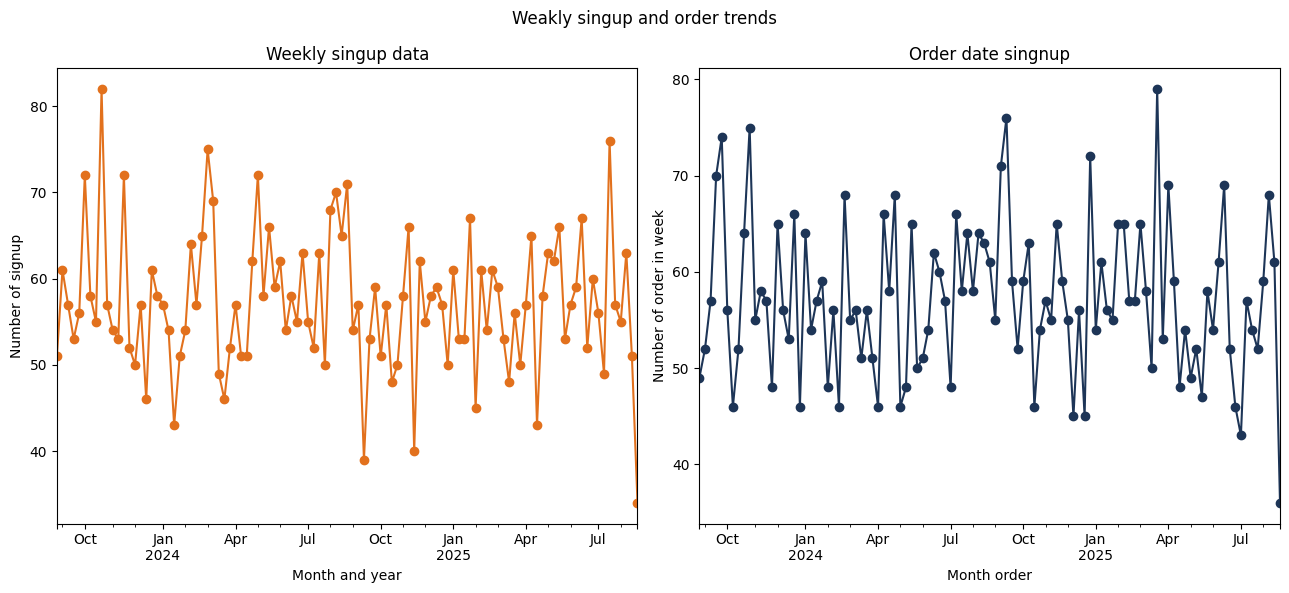

In [10]:
# Mothlys sign-up bounce and order rates trends
fig,ax=plt.subplots(1,2,figsize=(13,6))
# Resample the data on weekdays
weekly_singnup_data=df.resample('W',on='signup_date').size()
order_date_sample=df.resample('W',on='order_date').size()
weekly_singnup_data.plot(kind='line',marker='o',color='#e2711d',ax=ax[0])
ax[0].set_title('Weekly singup data')
ax[0].set_xlabel('Month and year')
ax[0].set_ylabel('Number of signup')
order_date_sample.plot(kind='line',marker='o',color='#1d3557',ax=ax[1])
ax[1].set_title('Order date singnup')
ax[1].set_xlabel('Month order')
ax[1].set_ylabel('Number of order in week')
fig.suptitle('Weakly singup and order trends')
plt.tight_layout()
plt.show()

## Total and average amount in each category

In [11]:
# Let's create dataframe to find the total amount and average amount spent in each age persons
age_wise_orders=pd.DataFrame(df.groupby('age')['revenue'].agg(['sum','mean']).sort_values(by='sum',ascending=False))
age_wise_orders.style.background_gradient(cmap='PuRd_r')


,sum,mean
age,,
Teenager,4966325.230000,2408.499142
Adult,4723873.060000,2380.984405
Senior,4653713.790000,2381.634488


## Gender wise Delivery_status percentage 

In [12]:
# Gender wise Delivery status percentage
gender_wise_order_status=pd.DataFrame(df.groupby('delivery_status')['gender'].value_counts(normalize=True).mul(100).unstack())
gender_wise_order_status.style.background_gradient(cmap='Pastel2_r')

gender,Female,Male,Other
delivery_status,,,
Cancelled,33.079268,33.079268,33.841463
Delayed,33.975659,33.468560,32.555781
Delivered,33.834951,34.271845,31.893204


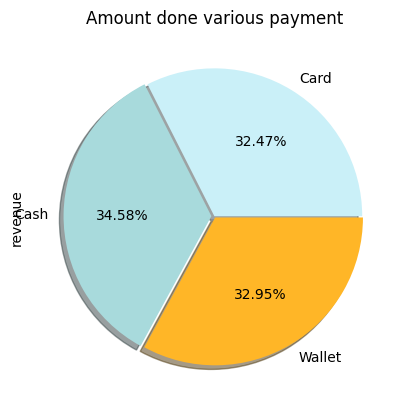

In [13]:
# Create a pie chart to understanding the which payment method mostly used
ax=df.groupby('payment_method')['revenue'].sum().plot(kind='pie',
    explode=[0,0.02,0.01],
    labels=['Card', 'Cash', 'Wallet'],
    colors=['#caf0f8','#a8dadc','#ffb627'],
    autopct='%1.2f%%',shadow=True,)
ax.set_title('Amount done various payment')
plt.show()

## We analyze restaurant data to predict which day receives the most orders from each restaurant, including KFC sales in each city, and so on.

In [14]:
# Top 10 orders from restaurant, and dish_names using groupby functions
df.groupby('order_date')[['restaurant_name','dish_name']].value_counts()\
.sort_values(ascending=False).head(10)\
.reset_index()

,order_date,restaurant_name,dish_name,count
0,2025-02-06,Subway,Fries,4
1,2025-02-06,Pizza Hut,Pasta,4
2,2023-10-19,McDonald's,Pasta,4
3,2024-09-05,Subway,Pasta,4
4,2025-05-09,Subway,Pizza,3
5,2023-10-23,Pizza Hut,Sandwich,3
6,2024-02-11,Burger King,Sandwich,3
7,2024-03-08,McDonald's,Sandwich,3
8,2024-10-27,Burger King,Fries,3
9,2024-08-17,Pizza Hut,Sandwich,3


In [15]:
# Write the query find the total revenue and the average amount in each location wise at KFC stores
df.query("restaurant_name=='KFC'")\
.groupby('city')['revenue'].agg(['sum','mean'])\
.style.background_gradient(cmap='gist_earth_r')

,sum,mean
city,,
Islamabad,679551.150000,2507.568819
Karachi,522859.030000,2196.886681
Lahore,543192.400000,2403.506195
Multan,645664.310000,2532.016902
Peshawar,562966.560000,2405.840000


## Information About Dishes, Total Prices, and Average Values for Each Restaurant


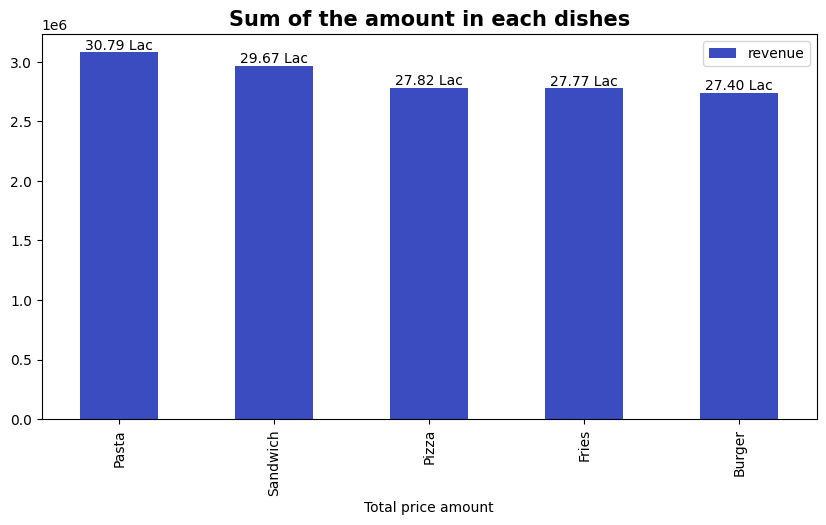

In [16]:
# Let's Create the bar chart for the total amount earned in each dishes 
total_amount_each_dish_name=pd.DataFrame(df.groupby('dish_name')['revenue'].sum().sort_values(ascending=False))
ax=total_amount_each_dish_name.plot(kind='bar',figsize=(10,5),colormap='coolwarm')
values=[p.get_height() for p in ax.patches]
ax.bar_label(ax.containers[0],labels=[f'{v/100000:.2f} Lac' for v in values],fontsize=10)
ax.set_title("Sum of the amount in each dishes",fontweight='bold',fontsize=15)
ax.set_xlabel('Total price amount')
plt.show()

In [17]:
# Write the query to sum the amount and the mean value for each restaurant.
df.query("gender=='Male'")\
.groupby('restaurant_name')['revenue']\
.agg(['sum','mean']).sort_values(by='sum',ascending=False)\
.style.background_gradient(cmap='spring_r')

,sum,mean
restaurant_name,,
Pizza Hut,1043645.680000,2484.870667
KFC,980601.370000,2439.306891
Subway,968097.910000,2332.766048
McDonald's,931413.210000,2406.752481
Burger King,916152.460000,2331.176743


# Customer behavior and loyalty: which customers spent the average amount at each restaurant?

In [18]:
# Top 5 and bottom 5 customers in the data 
avg_amount_spent_on=pd.DataFrame(df.groupby(['customer_id','dish_name'])['price'].mean())\
.sort_values(by='price',ascending=False)
top_5_customer=avg_amount_spent_on.nlargest(5,'price') # top 5 largest values
bottom_5_customers=avg_amount_spent_on.nsmallest(5,'price') # bottom 5 values
top_and_bottom_5_customer=pd.concat([top_5_customer,bottom_5_customers]) # combined the data using concat method
display(top_and_bottom_5_customer)

,,price
customer_id,dish_name,
C1227,Pasta,1499.95
C5781,Fries,1499.73
C5825,Fries,1499.68
C4114,Fries,1499.59
C3134,Burger,1499.37
C3245,Pizza,100.30
C1455,Burger,100.49
C3755,Sandwich,100.59
C2349,Pizza,101.16


## Average rating on each dish

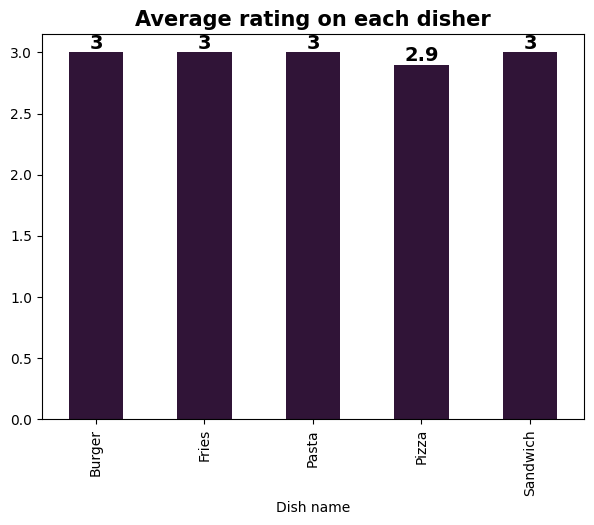

In [19]:
# Average Rating on each dishes
ax=df.groupby('dish_name')['rating'].mean().round(1)\
.plot(kind='bar',figsize=(7,5),fontsize=10,colormap='twilight_shifted')
ax.bar_label(ax.containers[0],fontsize=14,fontweight='bold')
ax.set_title(label='Average rating on each disher',fontsize=15,fontweight='bold',loc='center')
ax.set_xlabel('Dish name')
plt.show()

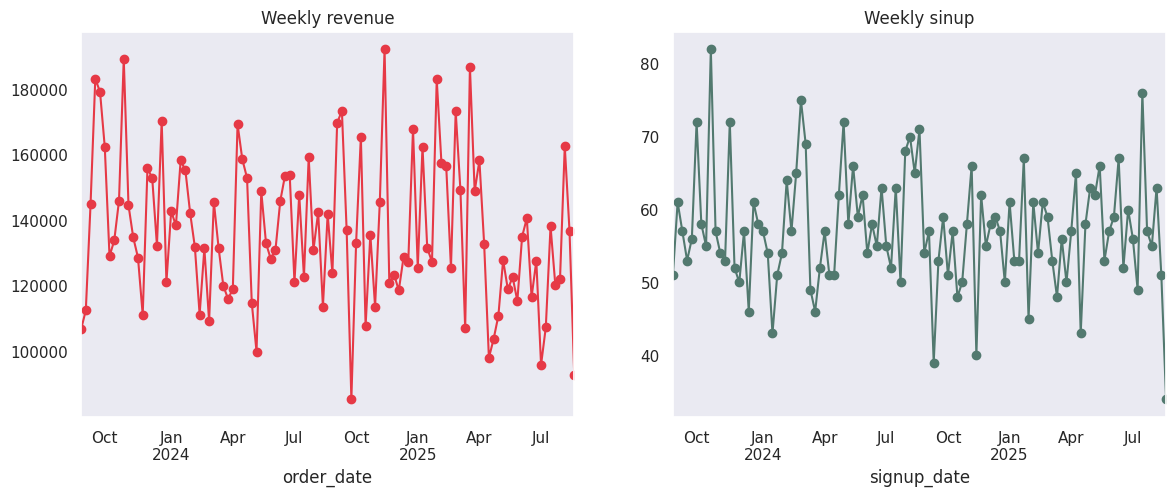

In [20]:
# Weekly revenue and weekly singup 
sns.set_theme(style='dark')
weekly_revenue=df.set_index('order_date').resample('W')['revenue'].sum()
weekly_sinup=df.set_index('signup_date').resample('W')['customer_id'].nunique()
fig,ax=plt.subplots(1,2,figsize=(14,5))
weekly_revenue.plot(ax=ax[0],title='Weekly revenue',marker='o',color='#e63946')
weekly_sinup.plot(ax=ax[1],title='Weekly sinup',marker='o',color='#52796f')
plt.show()

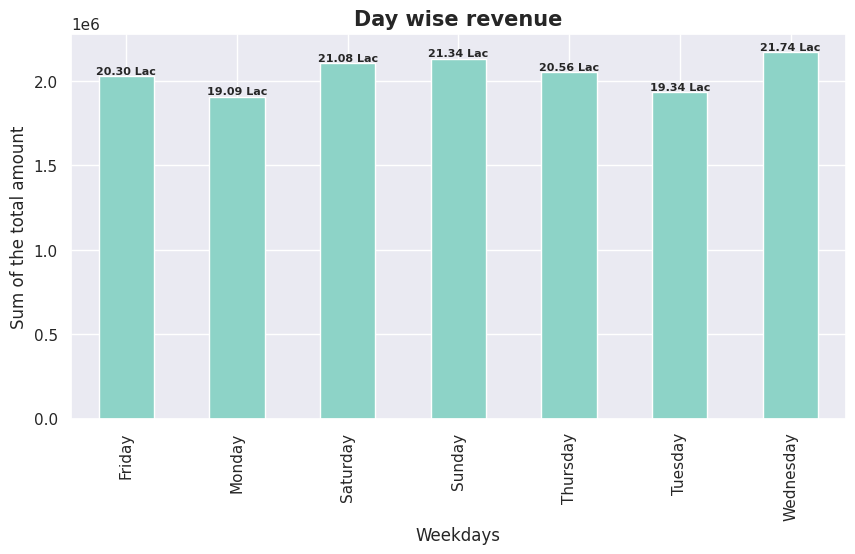

In [21]:
# create a new column, day, and assign the values and visualise the bar graph
sns.set_theme(style='darkgrid')
df['day']=df['order_date'].dt.weekday
condition=[
    (df['day']==0),(df['day']==1),(df['day']==2),(df['day']==3),(df['day']==4),(df['day']==5),(df['day']==6)
]
values=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day']=np.select(condition,values)
ax=df.groupby('day')['revenue'].sum().plot(kind='bar',figsize=(10,5),colormap='Set3')
value=[p.get_height() for p in ax.patches]
ax.bar_label(ax.containers[0],labels=[f'{val/100000:.2f} Lac' for val in value],fontsize=8,fontweight='bold')
ax.set_title('Day wise revenue',fontsize=15,fontweight='bold')
ax.set_xlabel('Weekdays')
ax.set_ylabel('Sum of the total amount')
plt.show()


In [22]:
# Year-wise busiest restaurant 
def color_map(val):
    result= '#00bbf9' if val >=600 else('#f95738' if val <=500 else '#ecf39e')
    return 'color: %s' % result
Year_wise_busy_restaurant=pd.DataFrame(df.set_index('order_date').resample('y')['restaurant_name'].value_counts().sort_values(ascending=False)).unstack()
Year_wise_busy_restaurant.style.applymap(color_map)


In [23]:
# Average and total amount for each category
sum_avg_category=pd.DataFrame(df.groupby('category')['revenue'].agg(['sum','mean']))
sum_avg_category.style.background_gradient(cmap='gist_gray_r')

,sum,mean
category,,
Chinese,2889236.970000,2411.717003
Continental,2928524.260000,2418.269414
Dessert,2649188.660000,2338.207114
Fast Food,2870929.690000,2349.369632
Italian,3006032.500000,2432.065129


<Axes: >

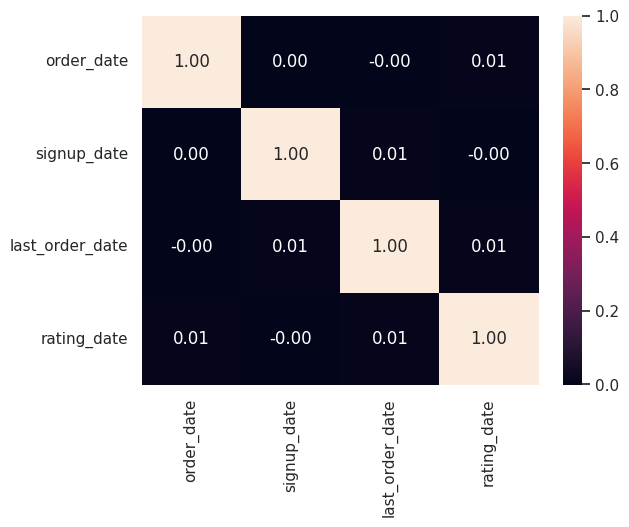

In [24]:
# Correlation about the date columns
df['days_after_sing_up_order']=(df['signup_date'] - df['order_date']).dt.days
cor=df[['order_date','signup_date','last_order_date','rating_date']].corr()
sns.heatmap(cor,annot=True,fmt='.2f')

## About insights of the EDA Process
* In the gender distribution, the values for males and females are quite similar when compared to others. 
* In terms of age distribution, teenagers also account for high sales and exhibit greater spending at restaurants. 
* Most customers prefer using cash compared to credit or debit cards. 
* Regarding total revenue, Pizza Hut generates the highest revenue, followed by KFC, and pasta is the dish that generates the most   revenue according to the data. 
* Wednesdays generate the highest revenue, while Saturdays and Sundays follow in second place during the weekends.


# Machine Learning Model
### About the model, it's a classification problem, so we use Logistic Regression, Decision Tree Classifier, and finally Random Forest algorithms. I then applied hyperparameter tuning afterward.

In [25]:
# Import Machine Learning libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# LabelEncdoer function
def lebel_encoder(df):
    label=LabelEncoder()
    return label.fit_transform(df)
df['customer_id']=lebel_encoder(df['customer_id'])
df['gender']=lebel_encoder(df['gender'])
df['age']=lebel_encoder(df['age'])
df['city']=lebel_encoder(df['city'])
df['restaurant_name']=lebel_encoder(df['restaurant_name'])
df['dish_name']=lebel_encoder(df['dish_name'])
df['category']=lebel_encoder(df['category'])
df['payment_method']=lebel_encoder(df['payment_method'])
df['order_id']=lebel_encoder(df['order_id'])
df['delivery_status']=lebel_encoder(df['delivery_status'])
df['churned']=lebel_encoder(df['churned'])
df['day']=lebel_encoder(df['day'])

# Split the data X,y
X=df.drop(['order_date','signup_date','last_order_date','rating_date'], axis=1)
y=df['delivery_status']
# Split the data train_test_Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=250)

# Model creation function
def model_buliding(model,X_train,X_test,y_train,y_test):
    # fit the model
    model.fit(X_train,y_train)
    #prediction
    model_pred=model.predict(X_test)
    model_pred_train=model.predict(X_train)
    score=accuracy_score(y_test,model_pred)*100
    train_score=accuracy_score(y_train,model_pred_train)*100
    print(f'The accuracy score is {score} ')
    print(f'The model train accuracy score is {train_score}')
    print('*'*50)
    print(classification_report(y_test,model_pred))
    print('*'*50)
    print(confusion_matrix(y_test,model_pred))
# Linear Regression Model
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)
linear=LogisticRegression()
model_buliding(linear,X_train,X_test,y_train,y_test)

The accuracy score is 38.333333333333336 
The model train accuracy score is 37.80392156862745
**************************************************
              precision    recall  f1-score   support

           0       0.68      0.09      0.15       291
           1       0.34      0.43      0.38       289
           2       0.39      0.61      0.48       320

    accuracy                           0.38       900
   macro avg       0.47      0.38      0.34       900
weighted avg       0.47      0.38      0.34       900

**************************************************
[[ 25 117 149]
 [  9 124 156]
 [  3 121 196]]


In [26]:
# DecisionTree Algorithm
tree=DecisionTreeClassifier()
model_buliding(tree,X_train,X_test,y_train,y_test)

The accuracy score is 100.0 
The model train accuracy score is 100.0
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       289
           2       1.00      1.00      1.00       320

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

**************************************************
[[291   0   0]
 [  0 289   0]
 [  0   0 320]]


In [27]:
# RandomForestClassifier algorithms
random=RandomForestClassifier()
model_buliding(random,X_train,X_test,y_train,y_test)

The accuracy score is 100.0 
The model train accuracy score is 100.0
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       289
           2       1.00      1.00      1.00       320

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

**************************************************
[[291   0   0]
 [  0 289   0]
 [  0   0 320]]


## Hyperparameters tuning for better result

In [28]:
# Logistic Regression Hyperparameter tuning
linear=LogisticRegression()
params={'penalty':['l2','l3','elasticnet'],
       'fit_intercept':[True,False],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg']
       }
linear_grid=GridSearchCV(linear,param_grid=params,n_jobs=10,cv=5)
linear_grid.fit(X_train,y_train)
linear_grid_pred=linear_grid.predict(X_test)
print('The best params {}'.format(linear_grid.best_params_))
print('Afte hyperparameter turning score{}'.format(linear_grid.best_score_))
print(f'The Linear model score {accuracy_score(y_test,linear_grid_pred)}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The best params {'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
Afte hyperparameter turning score1.0
The Linear model score 1.0


In [29]:
#DecisionTree Hyperparameter tuning
tree=DecisionTreeClassifier()
params={
    'criterion':['gini',"entropy"],
    'splitter':['best','random'],
    'max_depth':[5,10,15,20,25,30],
    'min_samples_split':[3,5,7,9,10]
    
}

tree_grid=GridSearchCV(tree,param_grid=params,cv=5)
tree_grid.fit(X_train,y_train)
tree_grid_pred=tree_grid.predict(X_test)
print('The decisiontree best params {}'.format(tree_grid.best_params_))
print('The decisiontree score {}'.format(tree_grid.best_score_))
print(f'The decisiontree {accuracy_score(y_test,tree_grid_pred)}')

The decisiontree best params {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3, 'splitter': 'best'}
The decisiontree score 1.0
The decisiontree 1.0


In [30]:
# RandomForest Classifier algorithms
random=RandomForestClassifier()
params={
    'n_estimators':[50,100,150],
    'criterion': ["gini", "entropy"],
    'max_depth':[3],
    'min_samples_split':[4]
    
    
    
}

random_grid=GridSearchCV(random,param_grid=params,cv=6)
#fit the data
random_grid.fit(X_train,y_train)
# prediction ot the data
random_grid_pred=random_grid.predict(X_test)
#best params
print('The random forest best {}'.format(random_grid.best_params_))
print('The random forest score {}'.format(random_grid.best_score_))
print(f'The random model {accuracy_score(y_test,random_grid_pred)}')

The random forest best {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
The random forest score 1.0
The random model 1.0


In [31]:
#All model scores 
data={
    'Model':['Logistic','DecisionTree', 'RandomForest'],
    'Befor_hyperparamet_turning_score':[48.88,1,1],
    'After_hyperparameter_turning_score':[1,1,1]
}
model_score=pd.DataFrame(data)
model_score

,Model,Befor_hyperparamet_turning_score,After_hyperparameter_turning_score
0,Logistic,48.88,1
1,DecisionTree,1.00,1
2,RandomForest,1.00,1


### Final Note about the Model.
* Before hyperparameter tuning, the logistic regression model achieved around a 49% score, while the random forest and decision tree models attained 100% accuracy. I also checked for overfitting in the data and found some articles explaining why my model achieved such high accuracy—mainly because the dataset is small. It seems that the model isn’t overfitting on the training data, which could indicate that the results are genuine. If you have any feedback or suggestions on how I can improve, I would greatly appreciate it!